In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
print(X_train[1].shape)

(28, 28)


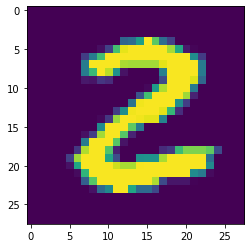

2


In [5]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

In [6]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [7]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [8]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [10]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(X_train, Y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0835 - accuracy: 0.9744
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0685 - accuracy: 0.9787
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0609 - accuracy: 0.9806
Epoch 7/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0513 - accuracy: 0.9838
Epoch 8/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0458 - accuracy: 0.9855


In [12]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0950 - accuracy: 0.9742
0.9742000102996826


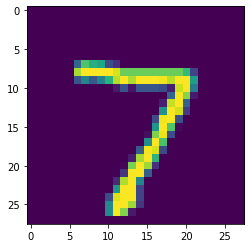

In [13]:
plt.imshow(X_test[0])
plt.show()

In [14]:
print(Y_test[0])

7


In [15]:
Y_pred = model.predict(X_test)

In [16]:
print(Y_pred.shape)

(10000, 10)


In [17]:
print(Y_pred[0])

[5.0625801e-02 5.2394551e-01 7.4598008e-01 5.8084178e-01 6.7981346e-05
 2.5050640e-03 2.5491752e-06 9.9999499e-01 2.1485686e-02 8.4047288e-02]


In [19]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [20]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 3, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [21]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [22]:
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    1,    1,    0,    1,    4,    4,    1,    2,    0],
       [   0, 1125,    3,    2,    0,    1,    2,    0,    2,    0],
       [   4,    0, 1013,    1,    1,    0,    2,    4,    6,    1],
       [   0,    0,    4,  980,    0,   11,    0,    3,    5,    7],
       [   0,    0,    7,    0,  948,    0,    8,    3,    2,   14],
       [   2,    0,    0,    8,    1,  873,    5,    1,    1,    1],
       [   0,    3,    0,    1,    1,    7,  944,    0,    2,    0],
       [   1,    6,   12,    8,    0,    0,    0,  984,    7,   10],
       [   4,    0,    5,    8,    2,    7,    2,    2,  943,    1],
       [   4,    6,    2,    8,    9,    6,    1,    3,    3,  967]],
      dtype=int32)>

Text(0.5, 42.0, 'Predicted Labels')

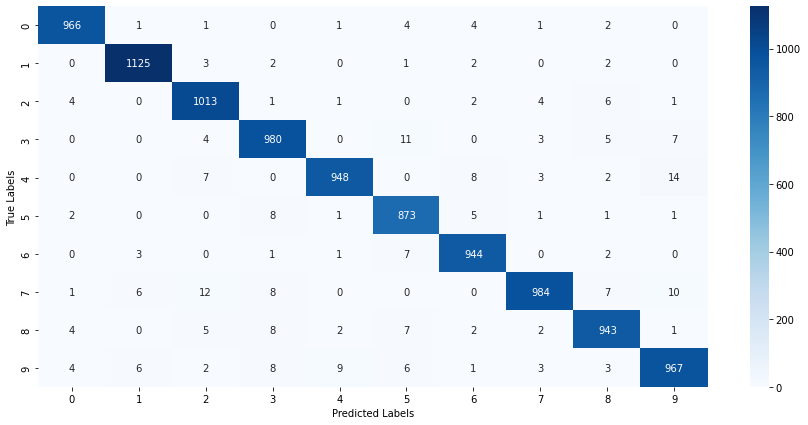

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [27]:
input_image_path = '/content/drive/MyDrive/3.png'

input_image = cv2.imread(input_image_path)

In [28]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


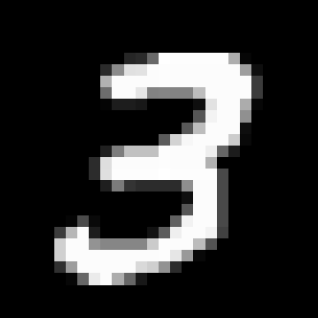

In [29]:
cv2_imshow(input_image)

In [30]:
input_image.shape

(318, 318, 3)

In [31]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [32]:
grayscale.shape

(318, 318)

In [33]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [34]:
input_image_resize.shape

(28, 28)

In [35]:
cv2_imshow(input_image_resize)

In [36]:
input_image_resize = input_image_resize/255

In [37]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [38]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

[[2.2528026e-07 8.4170043e-02 3.6608189e-02 1.0000000e+00 5.3656151e-09
  8.4339964e-01 1.6199809e-11 8.4862579e-05 5.6144094e-01 9.7670382e-01]]


In [39]:
input_pred_label = np.argmax(input_prediction)

In [40]:
print(input_pred_label)

3


Path of the image to be predicted: /content/drive/MyDrive/3.png


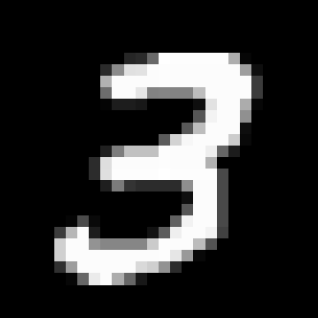

The Handwritten Digit is recognised as  3


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)